In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import random

# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)

In [2]:
# Read 'hourly' csv files
csv_files = os.listdir("data")
hourly_csv_files = [f for f in csv_files if '_1h.csv' in f]
hourlies = []
for i in range(len(hourly_csv_files)):
    hourlies.append(pd.read_csv('data/' + hourly_csv_files[i], header=1))

In [3]:
# Train Data
closes = {}
for i in range(len(hourlies)):
    temp = hourlies[i][hourlies[i]['date'] >= '2021-10-15 00:00:00']
    temp = temp[temp['date'] < '2021-12-01 00:00:00']
    if i == 0:
        closes['DATE'] = np.flip(temp['date'].values)
    closes[temp['symbol'].values[0]] = np.flip(temp['close'].values)

# Create the dataframe
df = pd.DataFrame(closes)
df = df.reindex(sorted(df.columns), axis=1)
cols = df.columns.tolist()
cols.remove('DATE')
cols = ['DATE'] + cols
df = df[cols]

# Normalize
train_df = df.copy()
norm_factors = {} # to remember normalizing factors
for c in train_df.columns.values:
    if c != 'DATE':
        norm_factors[c] = [train_df[c][0]]
        train_df[c] = train_df[c] / train_df[c][0]
train_df

,DATE,ADA/USDT,BNB/USDT,BTC/USDT,BTT/USDT,DASH/USDT,DOGE/USDT,EOS/USDT,ETC/USDT,ETH/USDT,LINK/USDT,LTC/USDT,NEO/USDT,QTUM/USDT,TRX/USDT,XLM/USDT,XMR/USDT,XRP/USDT,ZEC/USDT
0,2021-10-15 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2021-10-15 01:00:00,0.999535,0.993143,1.003650,0.998375,0.997287,0.998258,0.998242,0.996647,0.995459,0.996575,0.996641,0.997740,1.005824,1.000208,0.999170,0.998101,1.000628,0.993377
2,2021-10-15 02:00:00,1.012082,1.016070,1.035697,1.015980,1.018991,1.016986,1.019117,1.022541,1.017132,1.017504,1.027996,1.020570,1.027646,1.016460,1.018534,1.016711,1.019483,1.009106
3,2021-10-15 03:00:00,1.010688,0.997643,1.041741,1.014626,1.020076,1.016551,1.021094,1.036326,1.014583,1.020928,1.033035,1.021926,1.030520,1.018023,1.022130,1.021269,1.019573,1.012417
4,2021-10-15 04:00:00,1.020911,0.998714,1.044650,1.015710,1.026044,1.012195,1.030762,1.040611,1.015013,1.018265,1.036954,1.025542,1.031840,1.017919,1.017427,1.023547,1.019752,1.017384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,2021-11-30 19:00:00,0.730483,1.335547,1.010160,0.859697,0.985350,0.943380,0.887278,0.909277,1.238245,0.988965,1.182531,0.860081,1.281898,1.016981,0.946058,0.932017,0.903843,1.855132
1124,2021-11-30 20:00:00,0.726301,1.333190,1.006136,0.860238,0.980467,0.939460,0.886838,0.903502,1.233149,0.985921,1.174692,0.855561,1.279491,1.013751,0.943015,0.922522,0.901508,1.855132
1125,2021-11-30 21:00:00,0.727230,1.328477,1.000831,0.857259,0.975583,0.938589,0.882443,0.906297,1.228306,0.977169,1.170773,0.852170,1.297119,1.009063,0.936653,0.907330,0.897378,1.834437
1126,2021-11-30 22:00:00,0.725372,1.341547,1.003813,0.859697,0.982094,0.942509,0.887278,0.908905,1.235473,0.976408,1.172452,0.853752,1.273200,1.011876,0.938313,0.912647,0.902047,1.846854


In [4]:
# Test Data
closes = {}
for i in range(len(hourlies)):
    temp = hourlies[i][hourlies[i]['date'] >= '2021-12-01 00:00:00']
    temp = temp[temp['date'] < '2022-01-16 00:00:00']
    if i == 0:
        closes['DATE'] = np.flip(temp['date'].values)
    closes[temp['symbol'].values[0]] = np.flip(temp['close'].values)

# Create the dataframe
df = pd.DataFrame(closes)
df = df.reindex(sorted(df.columns), axis=1)
cols = df.columns.tolist()
cols.remove('DATE')
cols = ['DATE'] + cols
df = df[cols]

# Normalize
test_df = df.copy()
for c in test_df.columns.values:
    if c != 'DATE':
        norm_factors[c].append(test_df[c][0])
        test_df[c] = test_df[c] / test_df[c][0]
test_df

,DATE,ADA/USDT,BNB/USDT,BTC/USDT,BTT/USDT,DASH/USDT,DOGE/USDT,EOS/USDT,ETC/USDT,ETH/USDT,LINK/USDT,LTC/USDT,NEO/USDT,QTUM/USDT,TRX/USDT,XLM/USDT,XMR/USDT,XRP/USDT,ZEC/USDT
0,2021-12-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2021-12-01 01:00:00,0.994278,0.998412,0.989883,0.994984,0.990675,0.996295,0.995799,0.999183,0.992940,1.002333,0.992877,0.997361,1.000434,0.998871,1.002349,1.006276,0.992957,0.992088
2,2021-12-01 02:00:00,1.004450,1.005083,0.994520,0.996865,0.989578,1.001853,1.002965,1.008786,1.005290,1.006610,1.001899,1.001320,1.013026,1.002258,1.010276,1.008368,0.998710,0.981538
3,2021-12-01 03:00:00,1.007629,1.003971,0.996265,0.998746,0.993417,1.000926,1.004695,1.009399,1.007504,1.012830,1.009022,1.004751,1.018732,1.004413,1.012038,1.012552,1.003769,0.985934
4,2021-12-01 04:00:00,1.002543,1.001271,0.990922,0.998119,0.988481,0.996295,0.997776,0.999591,1.000620,1.009331,1.002849,1.001056,1.000496,1.006157,1.008514,1.007531,0.998810,0.978901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,2022-01-15 19:00:00,0.825811,0.791296,0.756001,0.799060,0.774547,0.867068,0.725229,0.677973,0.709019,0.998056,0.708927,0.672473,0.512219,0.709082,0.770112,0.914226,0.778097,0.638681
1100,2022-01-15 20:00:00,0.829625,0.790343,0.755249,0.799373,0.774547,0.865215,0.723005,0.676951,0.709377,0.990669,0.704653,0.671945,0.512033,0.707440,0.769524,0.912134,0.779883,0.637363
1101,2022-01-15 21:00:00,0.831532,0.785419,0.751979,0.794984,0.774547,0.862436,0.719298,0.673478,0.705628,0.986781,0.701804,0.671681,0.511289,0.704156,0.765414,0.910042,0.776312,0.634725
1102,2022-01-15 22:00:00,0.824539,0.787643,0.750948,0.793103,0.776193,0.855489,0.721522,0.673682,0.706532,0.987947,0.701804,0.674056,0.511413,0.704977,0.763359,0.911715,0.775221,0.635165


---

CONSTANT VALUES

In [5]:
# Constants
INITIAL_BUDGET = 10000
COMMISSION_RATE = 0.001  #  % 0.1

# Hyperparameter constants
MAX_ITER_SIZE = 5 # TODO: Probably should be higher, something like 100, 15 is just for testing
POPULATION_SIZE = 100
MUTATION_RATE = 0.01

---

# GENETIC ALGORITHM

#### 1. Generate a population of random chromosomes
#### 2. Calculate fitness of each chromosome
#### 3. Select best-fit chromosomes for reproduction
#### 4. Breed new generation through crossover and mutation (genetic operations)
#### 5. Replace old generation with new generation
#### 6. Repeat steps 2-5 until termination condition is satisfied
#### 7. Return the best chromosome

In [6]:
# Chromosome class
# which represents a single chromosome in the population, that corresponds to a solution (set of parameters)
class Chromosome:
    # Cryptos
    c1 = ""
    c2 = ""

    # Logs & Tracker
    logs = {
        'date':[],
        'long':[],
        'short':[],
        'long_price':[],
        'short_price':[],
        'long_amount':[],
        'short_amount':[],
        'budget':[],
    }
    tracker = {
        "money": INITIAL_BUDGET,
        "1": 0,
        "2": 0
    }

    # Parameters (to be optimized)
    up_spread = 0.0 # Should be between 0.0 and 1.0
    down_spread = 0.0 # Should be between 0.0 and 1.0

    # Fitness value of the chromosome
    fitness = 0.0

    # Constructor
    def __init__(self, c1, c2, up_spread, down_spread):
        self.c1 = c1
        self.c2 = c2
        self.up_spread = up_spread
        self.down_spread = down_spread
        self.tracker = {"money": INITIAL_BUDGET, self.c1: 0, self.c2: 0 }

    # Trade method (Buy/Sell)
    def trade(self, idx:int, long:str, short:str, is_train:bool):
        # Get the current date, long price, short price, long amount, short amount, and budget
        date = (train_df.iloc[idx]['DATE']) if is_train else (test_df.iloc[idx]['DATE'])
        long_price = (train_df.iloc[idx][long] * norm_factors[long][0]) if is_train else (test_df.iloc[idx][long] * norm_factors[long][1])
        short_price = (train_df.iloc[idx][short] * norm_factors[short][0]) if is_train else (test_df.iloc[idx][short] * norm_factors[short][1])
        budget = self.tracker["money"] + self.tracker[long] * long_price + self.tracker[short] * short_price
        long_amount = (budget * (1.0 - COMMISSION_RATE * 2)) / long_price # One commission for long, one commission for short
        short_amount = (budget * (1.0 - COMMISSION_RATE * 2)) / short_price # One commission for long, one commission for short
        # And then, save to logs
        self.logs['date'].append(date)
        self.logs['long'].append(long)
        self.logs['short'].append(short)
        self.logs['long_price'].append(long_price)
        self.logs['short_price'].append(short_price)
        self.logs['long_amount'].append(long_amount)
        self.logs['short_amount'].append(short_amount)
        self.logs['budget'].append(budget)

        # Now, actualize the trade:
        # Update the tracker
        self.tracker["money"] = budget * (1.0 - COMMISSION_RATE * 2) # One commission for long, one commission for short
        self.tracker[long] = long_amount
        self.tracker[short] = -short_amount

    # Fitness method
    def calc_fitness(self, data, is_train): # "data should be train_df if is_train is True, otherwise test_df"
        # TODO: Add one last trade at the end of the data for closing!!!
        # Init tracker & logs
        self.tracker = { "money": INITIAL_BUDGET, self.c1: 0, self.c2: 0 } # Keep track of the coins in the account
        self.logs = {
            'date':[],
            'long':[],
            'short':[],
            'long_price':[],
            'short_price':[],
            'long_amount':[],
            'short_amount':[],
            'budget':[],
        }

        # Trade
        position = 0 # 0: No position, 1: Long c1, -1: Short c1
        spread = data[self.c1] - data[self.c2]
        for i in range(data.shape[0]):
            if (spread[i]) > self.up_spread and position > -1: # Long second coin, Short first coin
                self.trade(idx=i, long=self.c2, short=self.c1, is_train=is_train)
                position = -1
            elif (-spread[i]) > self.down_spread and position < 1: # Long first coin, Short second coin
                self.trade(idx=i, long=self.c1, short=self.c2, is_train=is_train)
                position = 1
        
        # Calculate fitness
        # Fitness, the higher the better
        # Defined as money in the end (for now)
        self.fitness = self.tracker["money"]

    # Reproduction method: Crossover and mutation
    def reproduce(self, other):
        # Create a new chromosome by combining the parameters of the current chromosome and the other chromosome
        # Randomly pick a parameter from either of the chromosomes and add a small random value to it (crossover and mutation)
        return Chromosome(self.c1, self.c2, random.choice([self.up_spread, other.up_spread]) + random.uniform(-MUTATION_RATE, MUTATION_RATE), random.choice([self.down_spread, other.down_spread]) + random.uniform(-MUTATION_RATE, MUTATION_RATE))

Idea behind the parameters "up_spread" & "down_spread"

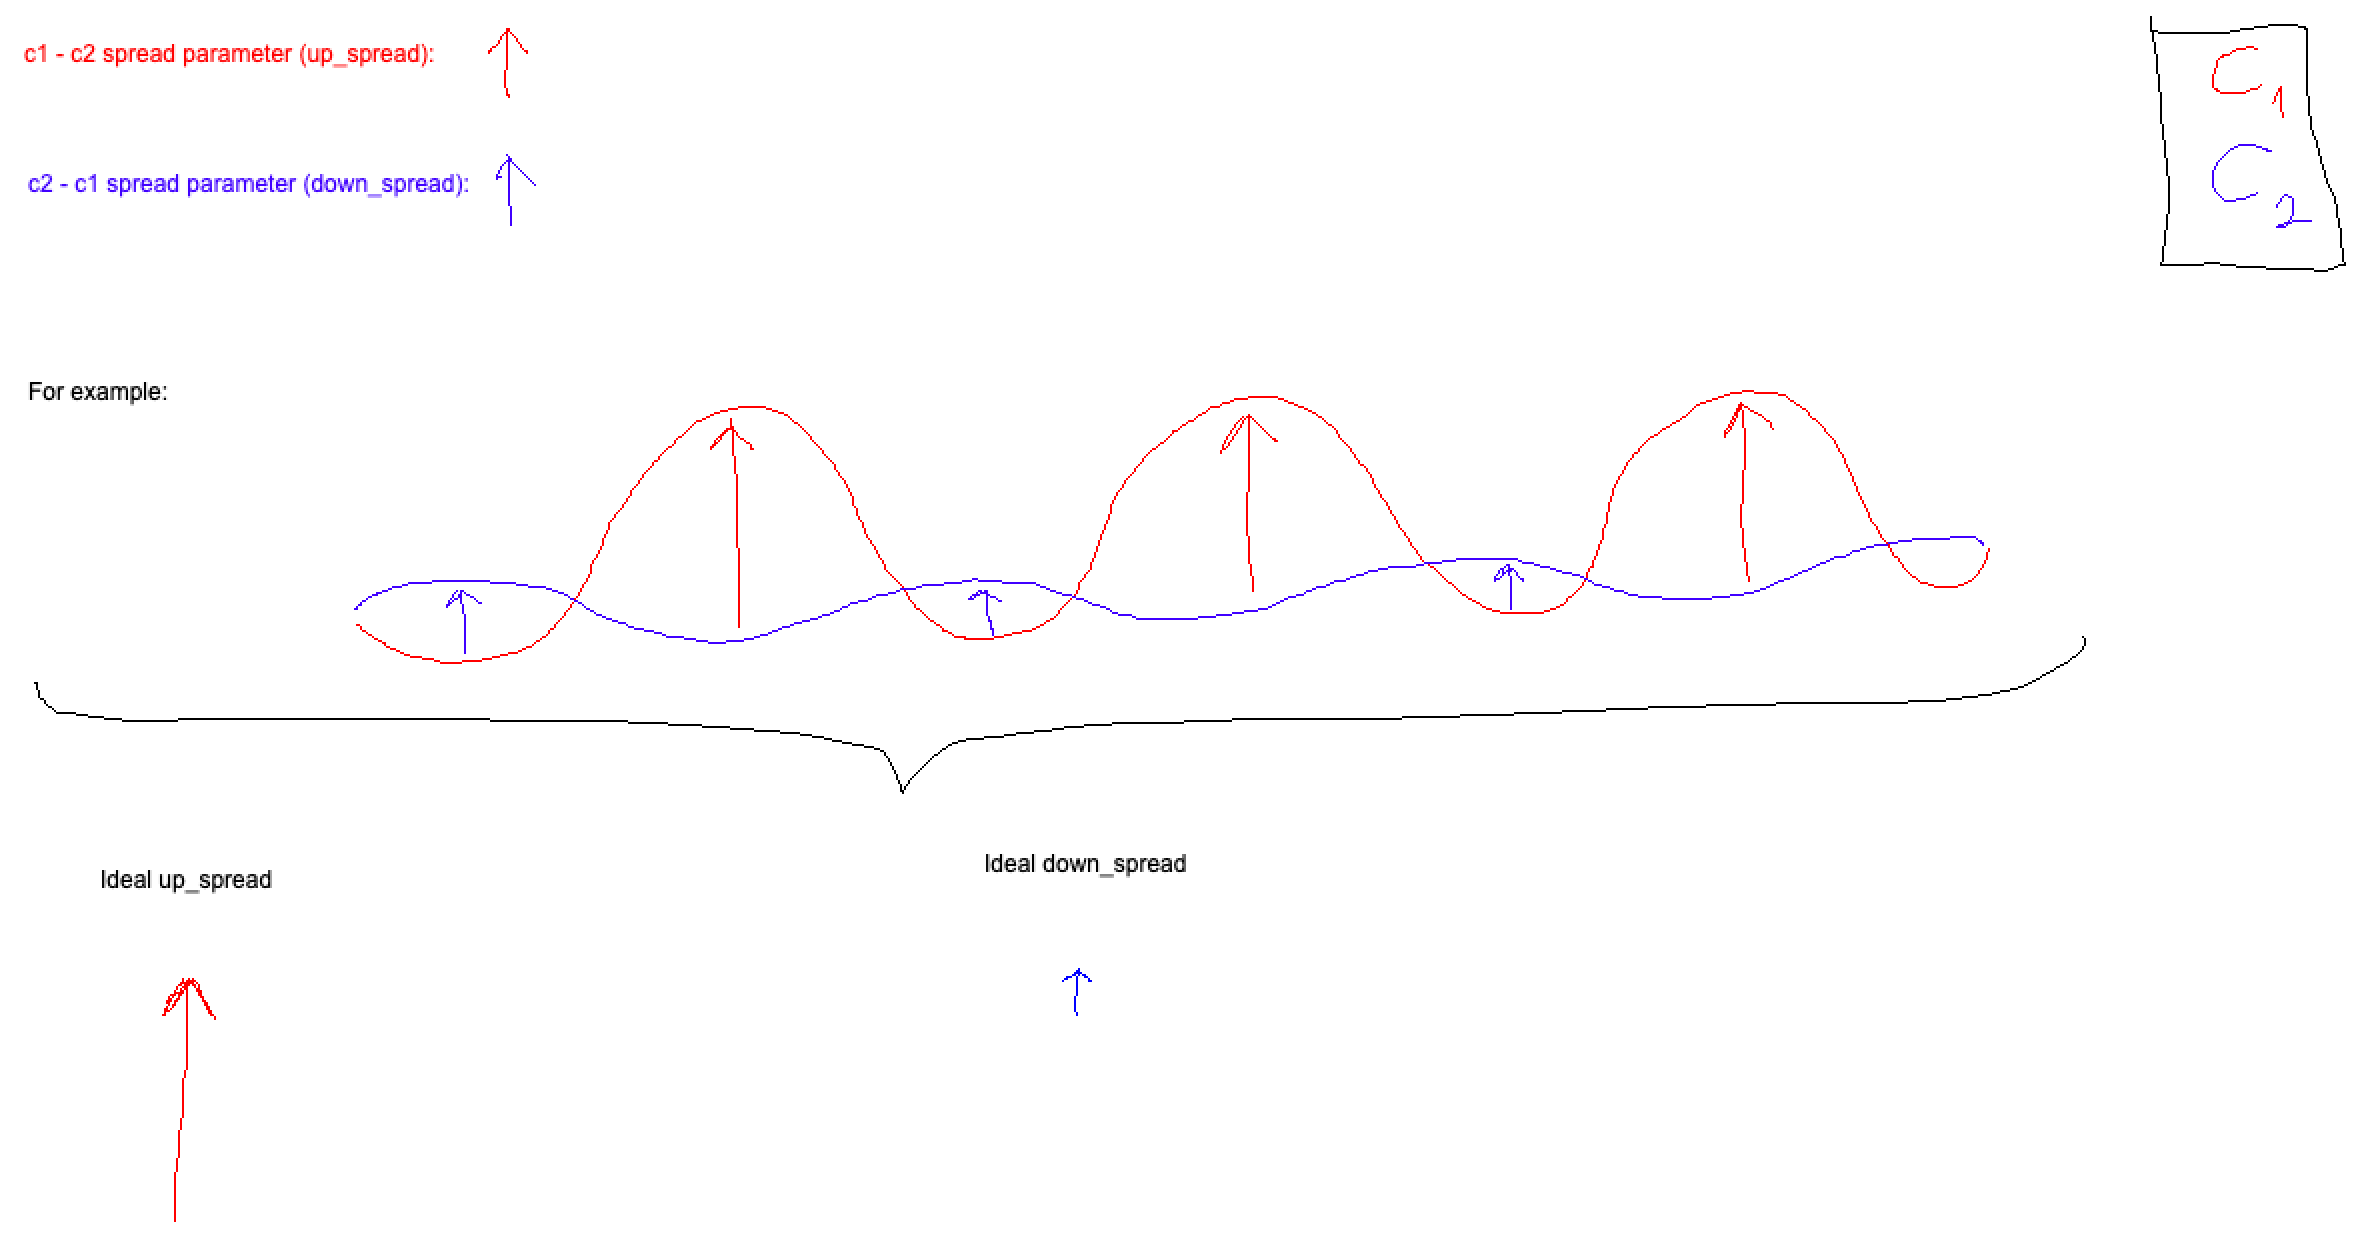

---

### TRAIN

In [7]:
# TRAINING
coins = train_df.columns.tolist()
coins.remove('DATE')

best_solutions = []
up_spread_values_of_best_solutions = pd.DataFrame(0.0, index=coins, columns=coins)
down_spread_values_of_best_solutions = pd.DataFrame(0.0, index=coins, columns=coins)
fitness_values_of_best_solutions_in_train = pd.DataFrame(0.0, index=coins, columns=coins)

for c1 in range(len(coins)-1):
    for c2 in range(c1+1, len(coins)):
        # (todo for later) : For pair selection, actually pairs with a correlation between 0.7 - 0.8 should be good.

        # Training fitness values by time
        training_fitness_values = []

        # 1. Generate a population of random chromosomes
        population = []
        for i in range(POPULATION_SIZE):
            population.append(Chromosome(c1=coins[c1], c2=coins[c2], up_spread=random.uniform(0.0, 1.0), down_spread=random.uniform(0.0, 1.0)))
        
        for _ in range(MAX_ITER_SIZE):
            # If has not improved for n iterations, then stop
            if len(training_fitness_values) > 10 and training_fitness_values[-10] == max(training_fitness_values[-10:]):
                break
            
            # 2. Calculate fitness of each chromosome
            for i in range(POPULATION_SIZE):
                population[i].calc_fitness(data=train_df, is_train=True)

            # 3. Select best-fit chromosomes for reproduction
            population.sort(key=lambda x: x.fitness, reverse=True)

            # 4. Breed new generation through crossover and mutation (genetic operations) & 
            # 5. Replace old generation with new generation
            population = population[:POPULATION_SIZE//2] # Select the best-fit half of the population (like elitism)
            for i in range(POPULATION_SIZE//2):
                population.append(population[i].reproduce(population[random.randint(0,POPULATION_SIZE//2-1)]))
            
            # Save the generation's best solution fitness value in each iteration
            training_fitness_values.append(population[0].fitness)
        
        # Save the best solution for each pair
        best_solutions.append( (population[0], coins[c1], coins[c2]) ) # Tuple of the best solution and the pair
        up_spread_values_of_best_solutions.loc[coins[c1]][coins[c2]] = population[0].up_spread
        down_spread_values_of_best_solutions.loc[coins[c1]][coins[c2]] = population[0].down_spread
        fitness_values_of_best_solutions_in_train.loc[coins[c1]][coins[c2]] = population[0].fitness

        # Print for readability during training
        print("Done with pair: ", coins[c1], coins[c2])
        print("Best solution's: ", "up_spread ->", population[0].up_spread, "| down_spread ->",  population[0].down_spread, "| fitness ->", population[0].fitness)
        print("Training fitness values: ", training_fitness_values)
        print('-'*50)

# TODO: 1) Add min # of trades required for passing to next gen !!! --- 2) Examine the logs to see if the fitness is increasing smoothly or not

Done with pair:  ADA/USDT BNB/USDT
Best solution's:  up_spread -> 0.0005718961279435053 | down_spread -> 0.3241560570046731 | fitness -> 13290.761748601913
Training fitness values:  [13290.761748601913, 13290.761748601913, 13290.761748601913, 13290.761748601913, 13290.761748601913]
--------------------------------------------------
Done with pair:  ADA/USDT BTC/USDT
Best solution's:  up_spread -> 0.9945253512382912 | down_spread -> 0.3749126734177676 | fitness -> 10000
Training fitness values:  [10000, 10000, 10000, 10000, 10000]
--------------------------------------------------
Done with pair:  ADA/USDT BTT/USDT
Best solution's:  up_spread -> 0.021800182738612728 | down_spread -> 0.06447203604690976 | fitness -> 10986.494358698632
Training fitness values:  [10986.494358698632, 10986.494358698632, 10986.494358698632, 10986.494358698632, 10986.494358698632]
--------------------------------------------------
Done with pair:  ADA/USDT DASH/USDT
Best solution's:  up_spread -> 0.0153665224

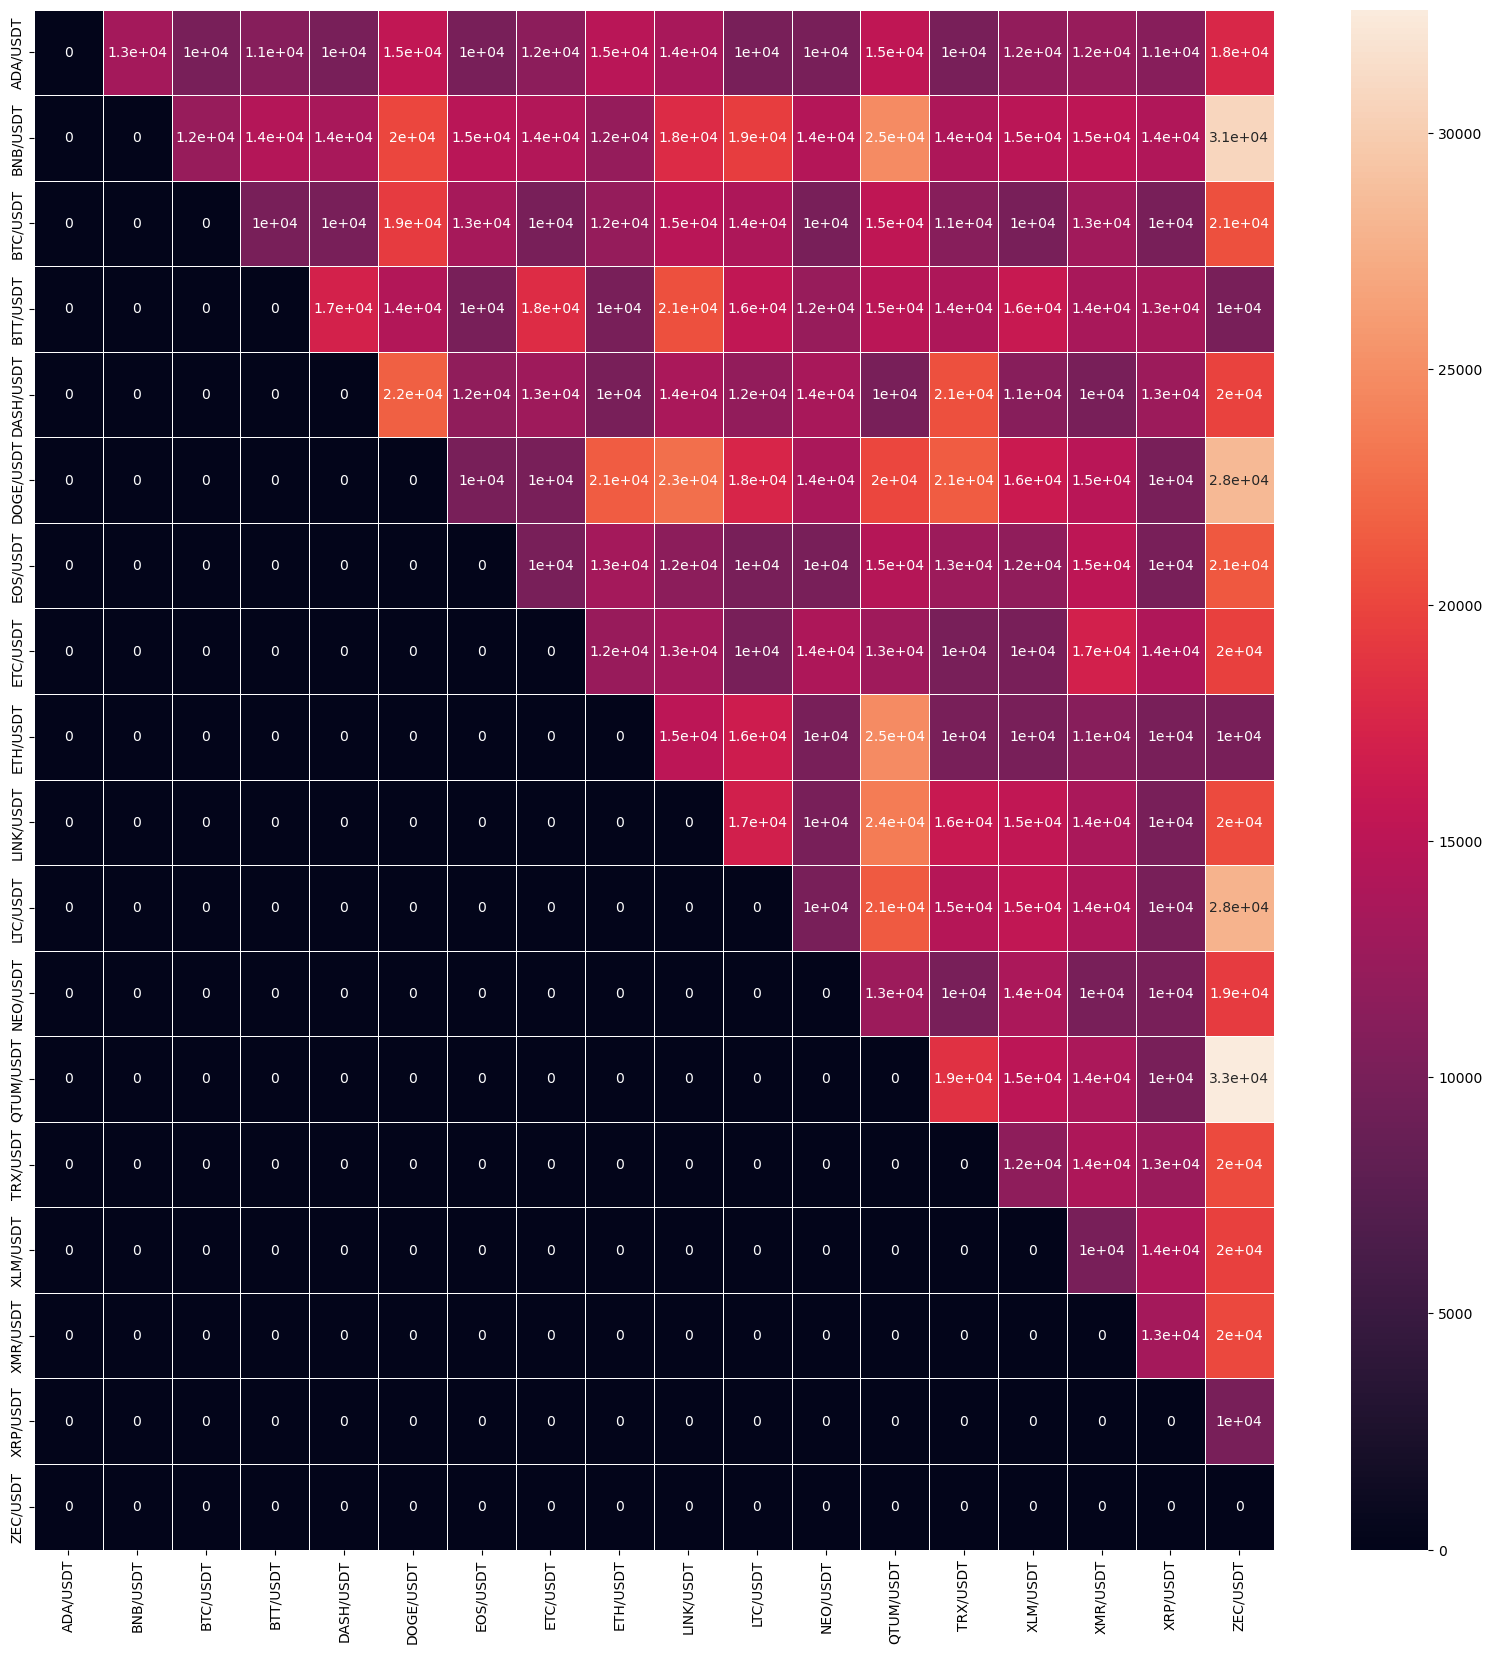

In [8]:
# Show the fitness values of the best solutions in the train set
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(fitness_values_of_best_solutions_in_train, annot=True, linewidths=.5, ax=ax)
plt.show()

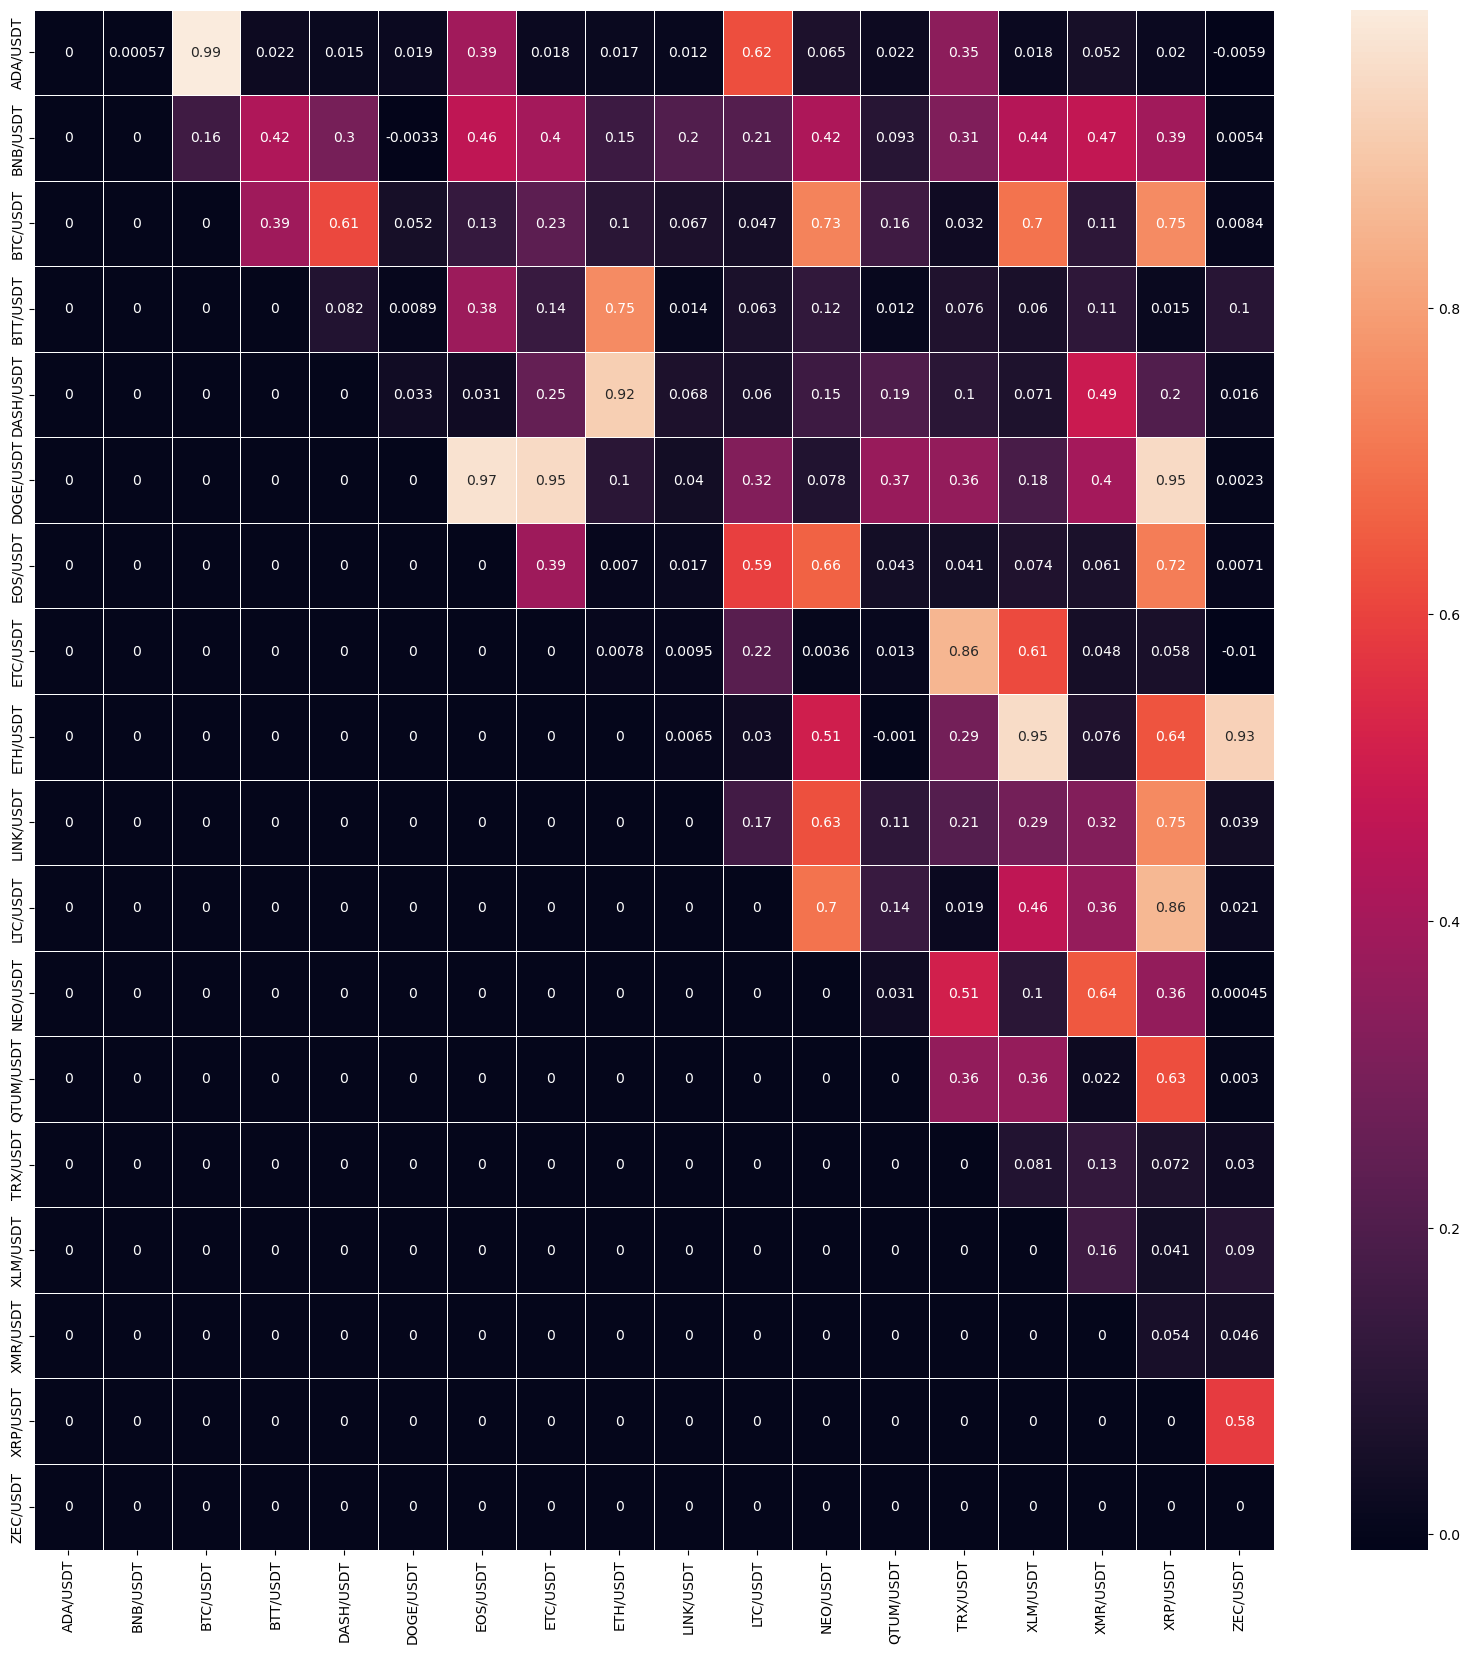

In [9]:
# Show the up_spread values found by the best solutions
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(up_spread_values_of_best_solutions, annot=True, linewidths=.5, ax=ax)
plt.show()

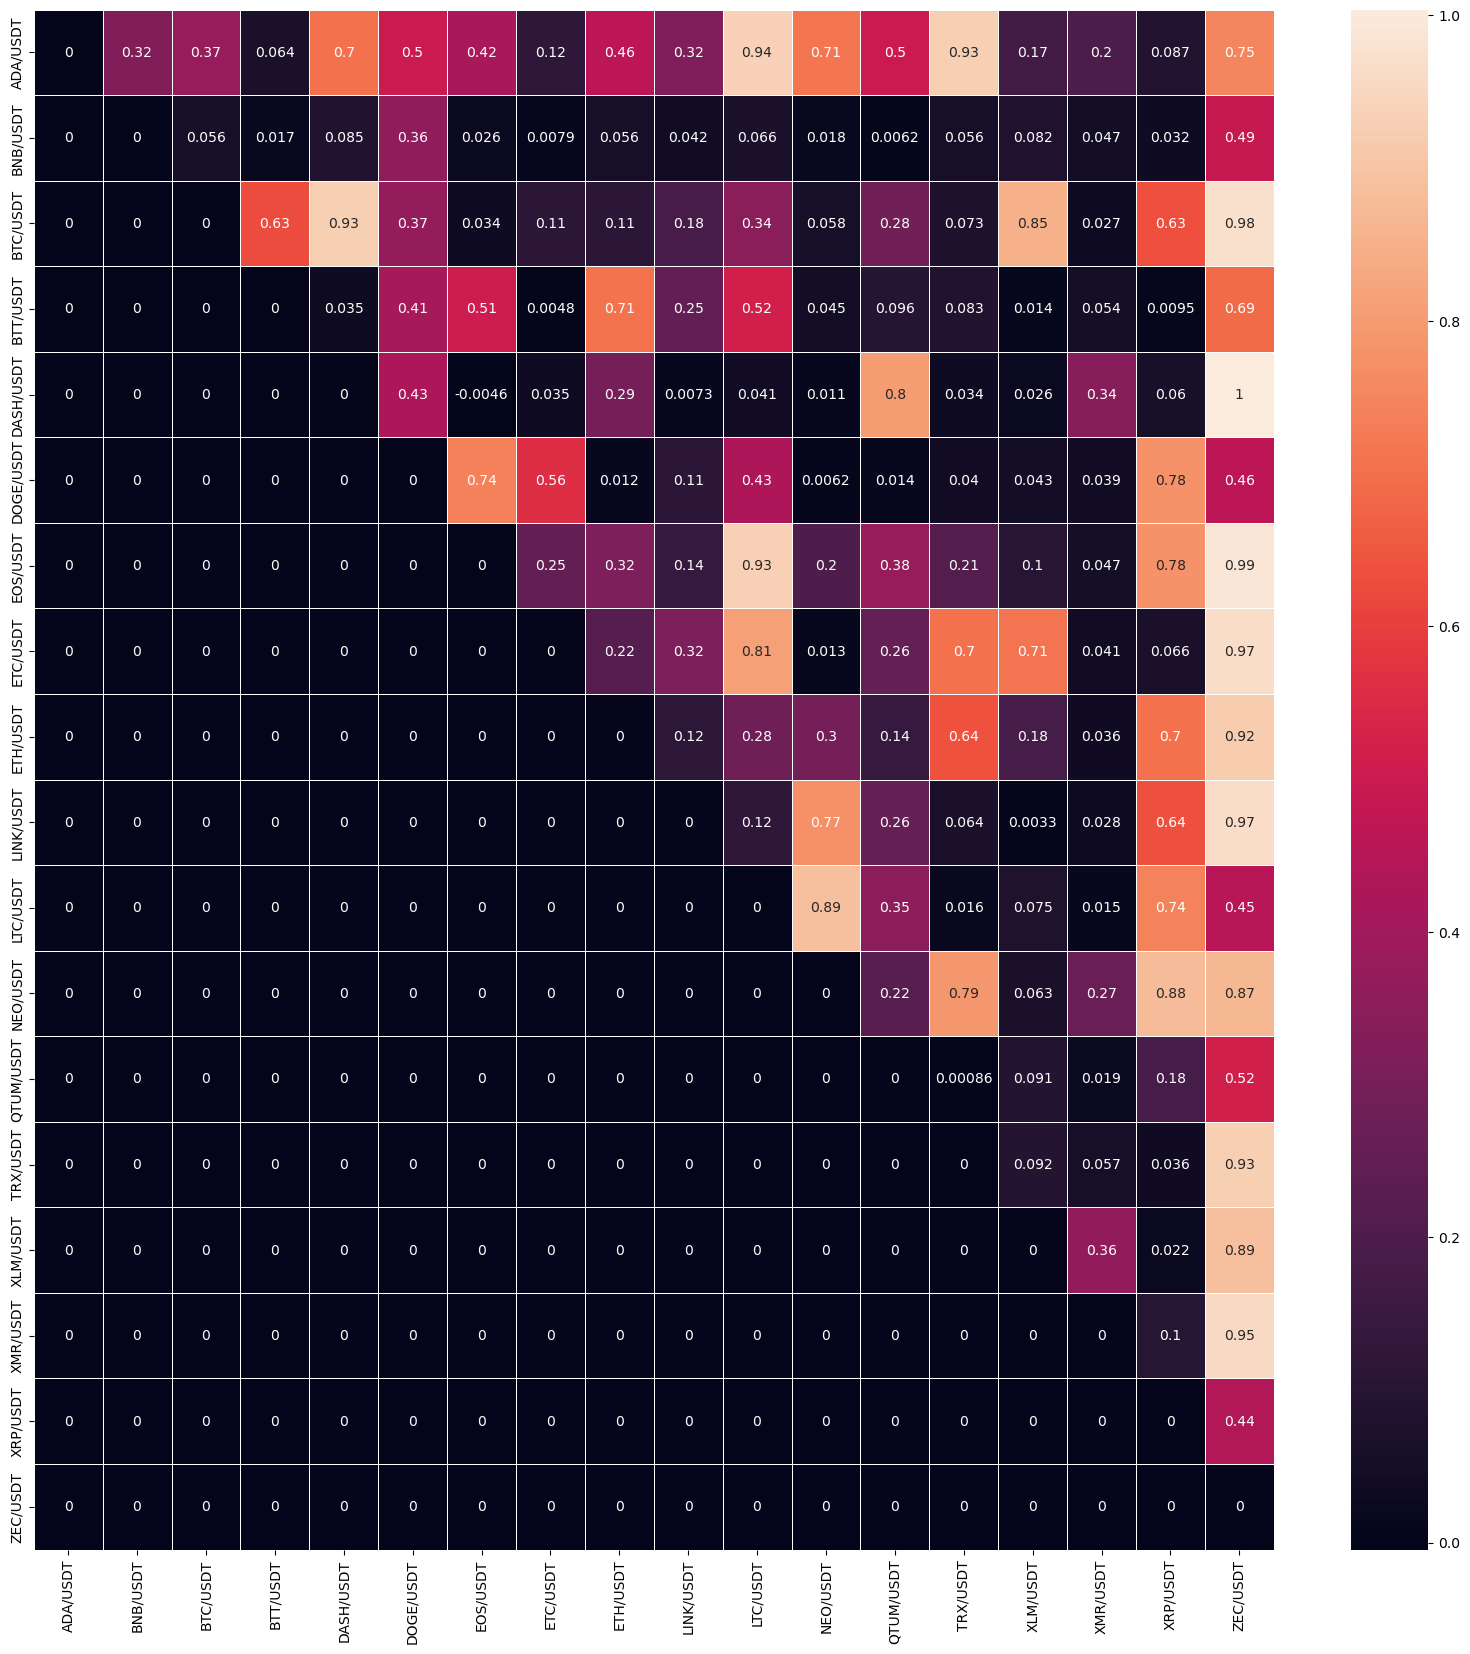

In [10]:
# Show the down_spread values found by the best solutions
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(down_spread_values_of_best_solutions, annot=True, linewidths=.5, ax=ax)
plt.show()

---

### TEST

In [11]:
# TESTING
coins = test_df.columns.tolist()
coins.remove('DATE')

fitness_values_of_best_solutions_in_test = pd.DataFrame(0.0, index=coins, columns=coins)

pair_idx = 0
for c1 in range(len(coins)-1):
    for c2 in range(c1+1, len(coins)):
        chromosome, c1_, c2_ = best_solutions[pair_idx]
        if c1_ != coins[c1] or c2_ != coins[c2]:
            print("Error in best solution ordering, did not come in the expected order.")
            break

        # Run the test
        chromosome.calc_fitness(data=test_df, is_train=False)
        fitness_values_of_best_solutions_in_test.loc[coins[c1], coins[c2]] = chromosome.fitness

        # Print for readability during testing
        print("Done with pair: ", coins[c1], coins[c2])
        print("Resulting Budget: ", chromosome.fitness)
        print('-'*50)

        pair_idx += 1

Done with pair:  ADA/USDT BNB/USDT
Resulting Budget:  9980.0
--------------------------------------------------
Done with pair:  ADA/USDT BTC/USDT
Resulting Budget:  10000
--------------------------------------------------
Done with pair:  ADA/USDT BTT/USDT
Resulting Budget:  18967.559514321307
--------------------------------------------------
Done with pair:  ADA/USDT DASH/USDT
Resulting Budget:  9980.0
--------------------------------------------------
Done with pair:  ADA/USDT DOGE/USDT
Resulting Budget:  9980.0
--------------------------------------------------
Done with pair:  ADA/USDT EOS/USDT
Resulting Budget:  10000
--------------------------------------------------
Done with pair:  ADA/USDT ETC/USDT
Resulting Budget:  9980.0
--------------------------------------------------
Done with pair:  ADA/USDT ETH/USDT
Resulting Budget:  9980.0
--------------------------------------------------
Done with pair:  ADA/USDT LINK/USDT
Resulting Budget:  13674.052232816322
------------------

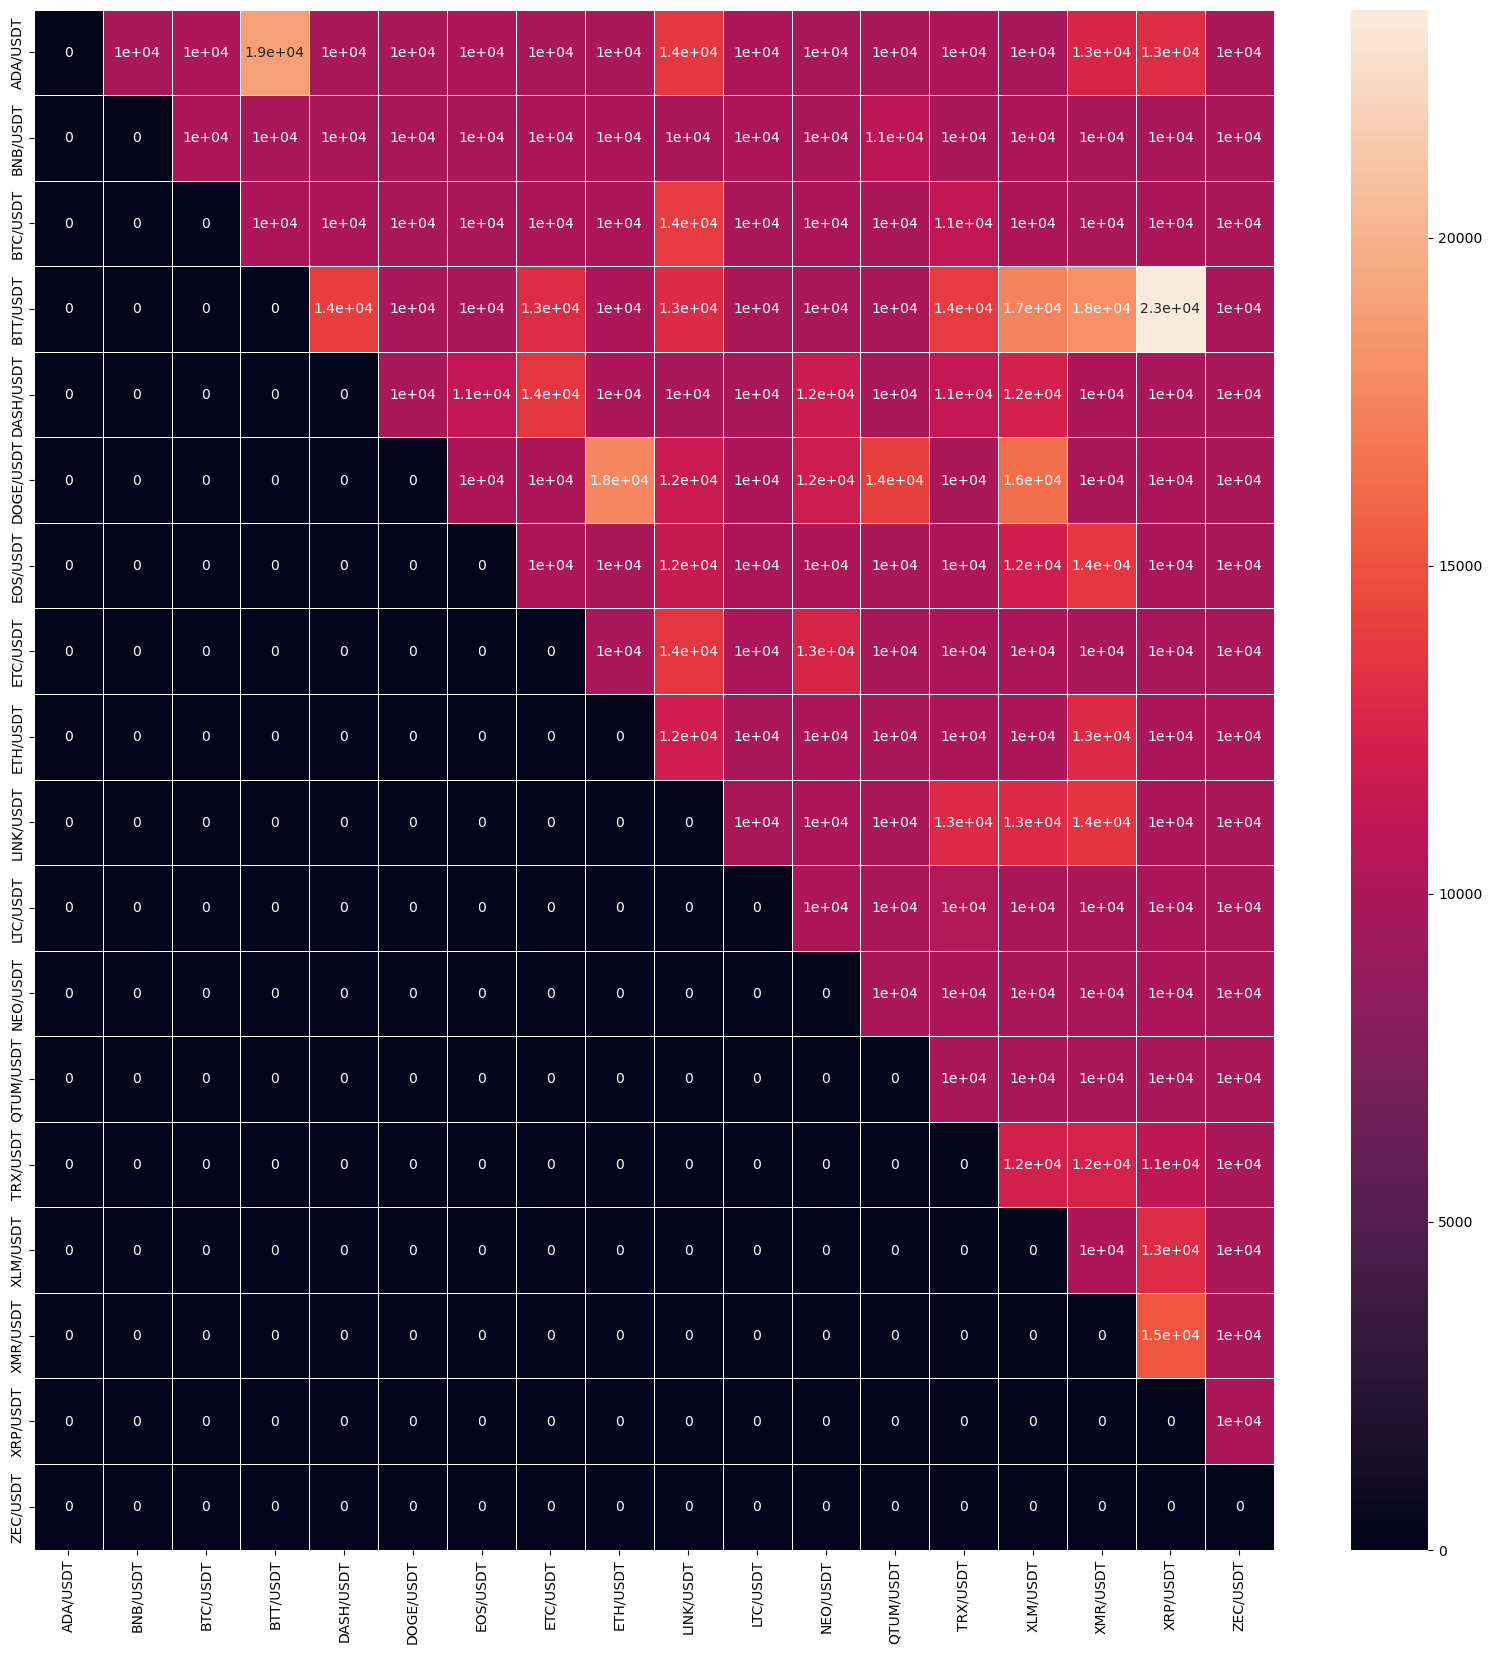

In [12]:
# Show the fitness values of the best solutions in the test set
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(fitness_values_of_best_solutions_in_test, annot=True, linewidths=.5, ax=ax)
plt.show()